Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [2]:
NICKNAME = "tttonyalpha"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [3]:
def deriv(f, x, h):
    p_1 = x + h
    p_2 = x + 2 * h
    return (-3*f(x) + 4*f(p_1) - f(p_2))/(2*h)


#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [4]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Видно, что погрешность аппроксимации стремится к нулю квадратично от ${h}$

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [5]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

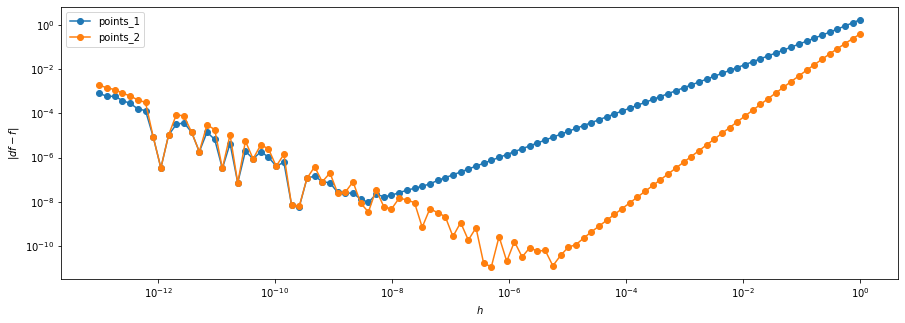

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

x_0 = 1
def two_p_der(f, x, h):
    p_1 = x + h
    return (f(p_1) - f(x))/h

def three_p_der(f, x, h):
    p_1 = x+h
    p_2 = x+2*h
    return (-3*f(x) + 4*f(p_1) - f(p_2))/(2*h)



points_1 = []
points_2 = []
mas_h = np.logspace(-13, 0, num=100)
for h in mas_h:
    points_1.append(abs(fder(x_0) - two_p_der(f, x_0, h)))
    points_2.append(abs(fder(x_0) - three_p_der(f, x_0, h)))


plt.figure(figsize=(15, 5))
plt.loglog(mas_h, points_1, "o-", label=f"points_1")
plt.loglog(mas_h, points_2, "o-", label=f"points_2")
plt.ylabel("$|df-f|$")
plt.xlabel("$h$")
plt.legend()
plt.show()


h_1 ~ 10^(-9)   
h_2 ~ 10^(-6)



### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [9]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


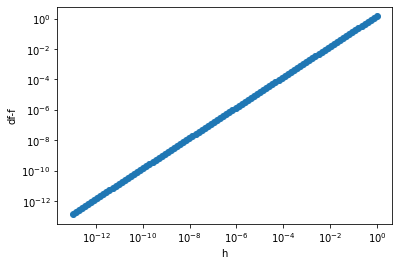

In [10]:
x_0 = 0
mas = []

for h in mas_h:
    mas.append(np.abs(three_p_der(f, x_0, h)-fder(x_0)))

plt.figure()

plt.loglog(mas_h, mas, '-o')
plt.xlabel('h')
plt.ylabel('df-f')
plt.show()

Df = f`(0) + 2*ln(2)*h

Что подтвержается графиком, наклон которого примерно 2*ln(2)


# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [ ]:
def ff(func, a, b , n):
    h = (b-a)/(n+1)
    ans = []
    for k in range(1, n+1):
        ans.append(h*(func(a+(1/2+k)*h)))
        return sum(ans)
def midpoint_rule(func, a, b, eps):
    p = int((b - a) // eps ** 0.5)
    fst = ff(func, a, b, p)
    flag = 1
    while flag:
        scnd = ff(func, a, b, 3*p)
        if abs(scnd - fst) < eps:
            flag = 0
        fst = scnd
        p *= 3
    return scnd, p * 3

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


8.914526202103679e-05 261


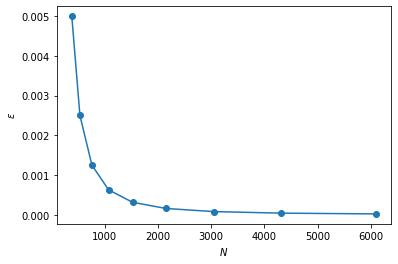

In [73]:
f = lambda x: x ** 2
ans, n = midpoint_rule(f, 0, 3, 10 ** (-2))
print(ans, n)

eps_list = []
N_list = []
for i in range(1, 10):
    eps = 0.01 / 2 ** i
    result, n = midpoint_rule(f, 0, 3, eps)
    eps_list.append(eps)
    N_list.append(n)

plt.plot(N_list, eps_list, '-o')
plt.ylabel(r'$\varepsilon$')
plt.xlabel(r'$N$')
plt.show()

как видно, что сходимость равна $\frac{1}{N^2}$

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [116]:
def f_t(t):
    return 2 * np.sin(t) / t

def f(x):
    return 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)


print(f'Прямое: {midpoint_rule(f_t, 0, 1, 1e-4)}')
print(f'Предобработка : {midpoint_rule(f, 0, 1, 1e-4)}')


Прямое: (2.7711577895250414e-05, 216513)
Предобработка : (2.770105001988634e-05, 216513)


# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [117]:
def trap(f, a, b , n):
    return sum([((b-a)/n/2)*(f(a+k*(b-a)/n)+f(a+(k-1)*(b-a)/n)) for k in range(1, n+1)])

def integ(npts=10):
    return trap(lambda x: np.exp(x)/np.sqrt(x*(1-x)), 1/npts, 1-1/npts, npts) + (np.e+1)*(2*np.sqrt(1/npts)+1/npts**(3/2))
ans = integ(10000)
print(ans)

5.509906958218984


In [118]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
